## Shark attacks

In [513]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [514]:
sharks = pd.read_excel("GSAF5.xls",  na_values=["UNKNOWN"])

In [515]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2017.07.09,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'","Miami-Beach Patch, 7/9/2017",2017.07.09-Lanza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.09,2017.07.09,6105.0,NaN,NaN
1,2017.07.07,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,Teen,"No injury, shark bit surfboard",N,15h00,"White shark, 2.5 m","Dispatch Live, 7/7/2027",2017.07.07-Stein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.07,2017.07.07,6104.0,NaN,NaN
2,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,NaN,"Skull found in shark, a probable drowning & sc...",F,NaN,NaN,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6103.0,NaN,NaN
3,2017.06.29,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,NaN,"Arm injured by hook, not by a shark",N,19h30,NaN,"C. Creswell, GSAF",2017.06.29-Wrightsville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29,2017.06.29,6102.0,NaN,NaN
4,2017.06.29.R,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,Teen,Left foot bitten,N,NaN,NaN,"TriStateHomePage, 6/29/2017",2017.06.29.R-Wallhauser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29.R,2017.06.29.R,6101.0,NaN,NaN
5,2017.06.19,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,NaN,1 to 2-inch laceration behind knee,N,Morning,NaN,"CBS12, 6/19/2017",2017.06.19-SingerIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.19,2017.06.19,6100.0,NaN,NaN
6,2017.06.18.b,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,14,Leg bitten,N,NaN,"Bull shark, 4' to 5'","NBC, 6/29/2017",2017.06.18.b-Readnour.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.b,2017.06.18.b,6099.0,NaN,NaN
7,2017.06.18.a,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,"Bull shark, 2m","Clincanoo, 6/19/2017",2017.06.18.a-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.a,2017.06.18.a,6098.0,NaN,NaN
8,2017.06.17,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa d’en Bossa,Swimming,male,M,82,2-inch laceration to hand,N,12h00,NaN,"Diario de Ibiza, 6/17/'2017",2017.06.17-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.17,2017.06.17,6097.0,NaN,NaN
9,2017.06.14.R,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN,"AOL.UK, 6/14/2017",2017.06.14.R-Carly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.14.R,2017.06.14.R,6096.0,NaN,NaN


In [516]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [517]:
sharks.drop(sharks.columns[[0, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1, inplace=True)

In [518]:
sharks['Year'].describe()

count    6102.000000
mean     1926.346444
std       284.157124
min         0.000000
25%      1942.000000
50%      1976.000000
75%      2004.000000
max      2018.000000
Name: Year, dtype: float64

In [519]:
sharks.rename(columns={"Sex ": "Sex"}, inplace=True)

In [520]:
sharks["Sex"].value_counts().head()

M      4911
F       610
M         2
lli       1
.         1
Name: Sex, dtype: int64

In [521]:
sharks["Sex"].value_counts(dropna=False)

NaN    20091
M       4911
F        610
M          2
lli        1
.          1
N          1
Name: Sex, dtype: int64

In [522]:
sharks.dropna(subset=["Sex"], inplace=True)

In [523]:
sharks["Sex"].unique()

array(['M', 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [524]:
sharks = sharks[sharks["Sex"].isin(["M","F"])]

In [525]:
sharks["Sex"].head()

0    M
1    F
3    M
4    F
5    M
Name: Sex, dtype: object

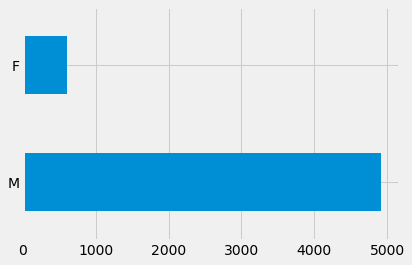

In [526]:
sharks["Sex"].value_counts().plot(kind='barh')

In [527]:
sharks["Country"].value_counts().head()

USA                 2060
AUSTRALIA           1158
SOUTH AFRICA         507
PAPUA NEW GUINEA     114
NEW ZEALAND          111
Name: Country, dtype: int64

In [528]:
sharks["Fatal (Y/N)"].value_counts()

N                 4019
Y                 1419
 N                   8
2017                 1
--M524--M3133Y       1
Name: Fatal (Y/N), dtype: int64

In [529]:
sharks.groupby(["Country", "Fatal (Y/N)"]).sum()

Year
Country                               Fatal (Y/N)           
 PHILIPPINES                          Y               1944.0
 TONGA                                N               2000.0
                                      Y               4008.0
ADMIRALTY ISLANDS                     N               1962.0
ALGERIA                               Y               1844.0
AMERICAN SAMOA                        Y               5867.0
ANDAMAN / NICOBAR ISLANDAS            Y               1958.0
ANGOLA                                N               1993.0
ANTIGUA                               N               2011.0
ARGENTINA                             N               1954.0
ARUBA                                 Y               2015.0
ASIA?                                 N                  0.0
ATLANTIC OCEAN                        N               9876.0
                                      Y              11466.0
AUSTRALIA                              N             11760.0
                                      N            1568622.0
                                      Y             625482.0
AZORES                                N               5891.0
BAHAMAS                               N             169472.0
                                      Y              23393.0
BAHREIN                               Y                  0.0
BARBADOS                              N               3598.0
                                      Y               5408.0
BAY OF BENGAL                         Y               1942.0
BELIZE                                N               2013.0
                                      Y               2006.0
BERMUDA                               N              15645.0
                                      Y               1959.0
BRAZIL                                N             107890.0
                                      Y              67806.0
BRITISH ISLES                         N               1971.0
BRITISH NEW GUINEA                    N               1890.0
BRITISH VIRGIN ISLANDS                Y               2007.0
BRITISH WEST INDIES                   N               1962.0
BURMA                                 N                  0.0
                                      Y               3788.0
Between PORTUGAL & INDIA              Y               1580.0
CANADA                                N              11696.0
                                      Y               3779.0
CAPE VERDE                            N               2016.0
                                      Y               3861.0
CARIBBEAN SEA                         N               3953.0
                                      Y               5714.0
CAYMAN ISLANDS                        N               4030.0
CENTRAL PACIFIC                       N               1943.0
                                      Y               1943.0
CEYLON (SRI LANKA)                    Y                  0.0
CHILE                                 N               7981.0
                                      Y               7865.0
CHINA                                 N               5928.0
...                                                      ...
SOUTHWEST PACIFIC OCEAN               Y               1942.0
SPAIN                                 N              51252.0
                                      Y              14945.0
SRI LANKA                             N              19317.0
                                      Y               5672.0
ST HELENA, British overseas territory N               2017.0
ST. MAARTIN                           N               2005.0
ST. MARTIN                            N               2014.0
SUDAN                                 N               1952.0
                                      Y               1966.0
SUDAN?                                N               1954.0
SYRIA                                 Y               1880.0
Seychelles                            Y               2005.0
Sierra Leone                  

In [530]:
sharks["Year"].head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [531]:
sharks['Year'].replace('.0', '').head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [532]:
sharks["Year"].head().astype(int)

0    2017
1    2017
3    2017
4    2017
5    2017
Name: Year, dtype: int64

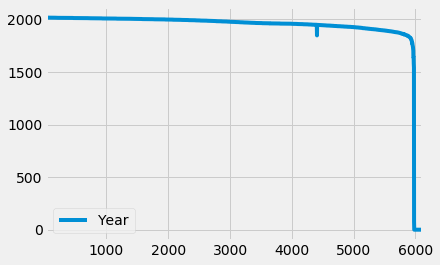

In [533]:
sharks[sharks["Fatal (Y/N)"] == "Y"].plot()

In [534]:
df_fatal= sharks[sharks["Fatal (Y/N)"] == "Y"]

In [535]:
df_fatal

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
21,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN
26,29-Apr-2017,2017.0,Unprovoked,REUNION,Saint-Leu,Pointe au Sal,Body boarding,Adrien Dubosc,M,28,FATAL,Y,11h15,NaN
32,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,17,FATAL,Y,16h00,White shark
50,21-Feb-2017,2017.0,Unprovoked,REUNION,Saint-Andre,NaN,Body boarding,Alexandre Naussance,M,26,Fatal,Y,09h30,NaN
96,06-Sep-2016,2016.0,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN
142,05-Jun-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,Mindarie,Diving,Doreen Collyer,F,60,FATAL,Y,11h30,3+ m shark
146,31-May-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,"Falcon Beach, Mandurah",Surfing,Ben Gerring,M,29,FATAL,Y,16h00,White shark
162,09-Apr-2016,2016.0,Unprovoked,NEW CALEDONIA,Grand Terre,Poe Beach,Walking,Nicole Malignon,F,69,FATAL,Y,10h45,"Tiger shark, 2.5 m"
173,10-Mar-2016,2016.0,Unprovoked,Fiji,Vanua Levu,NaN,Diving for beche-de-mer,Maika Tabua,M,45,FATAL,Y,Afternoon,NaN
198,19-Dec-2015,2015.0,Unprovoked,ARUBA,NaN,Boat capsized,Sea disaster,Adrian Esteban Rafael,M,58,FATAL,Y,NaN,NaN


In [536]:
df_nonfatal = sharks[sharks["Fatal (Y/N)"] == "N"]
df_nonfatal['Fatal (Y/N)'].value_counts()

N    4019
Name: Fatal (Y/N), dtype: int64

In [537]:
pd.set_option('display.max_columns', 100)

In [538]:
pd.set_option('display.max_rows', 100)

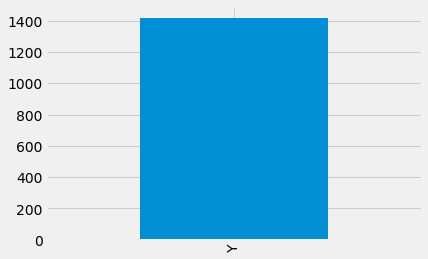

In [539]:
df_fatal['Fatal (Y/N)'].value_counts().plot(kind='bar')
#df_living['Fatal (Y/N)'].value_counts().plot(kind='bar')

In [540]:
attack = sharks.groupby(['Year','Fatal (Y/N)'])['Area'].count().to_frame().reset_index()

In [541]:
attack[attack['Fatal (Y/N)'] == 'Y'] 

,Year,Fatal (Y/N),Area
1,0.0,Y,42
3,77.0,Y,1
4,1543.0,Y,1
5,1580.0,Y,0
6,1642.0,Y,1
8,1700.0,Y,0
10,1721.0,Y,1
11,1738.0,Y,1
12,1742.0,Y,0
13,1748.0,Y,1


In [542]:
attack = attack[(attack["Year"]>1970) & (attack["Year"]<2017)]

In [553]:
sharks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'"
1,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,Teen,"No injury, shark bit surfboard",N,15h00,"White shark, 2.5 m"
3,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,NaN,"Arm injured by hook, not by a shark",N,19h30,NaN
4,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,Teen,Left foot bitten,N,NaN,NaN
5,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,NaN,1 to 2-inch laceration behind knee,N,Morning,NaN
6,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,14,Leg bitten,N,NaN,"Bull shark, 4' to 5'"
7,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,"Bull shark, 2m"
8,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa d’en Bossa,Swimming,male,M,82,2-inch laceration to hand,N,12h00,NaN
9,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN
10,11-Jun-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m"


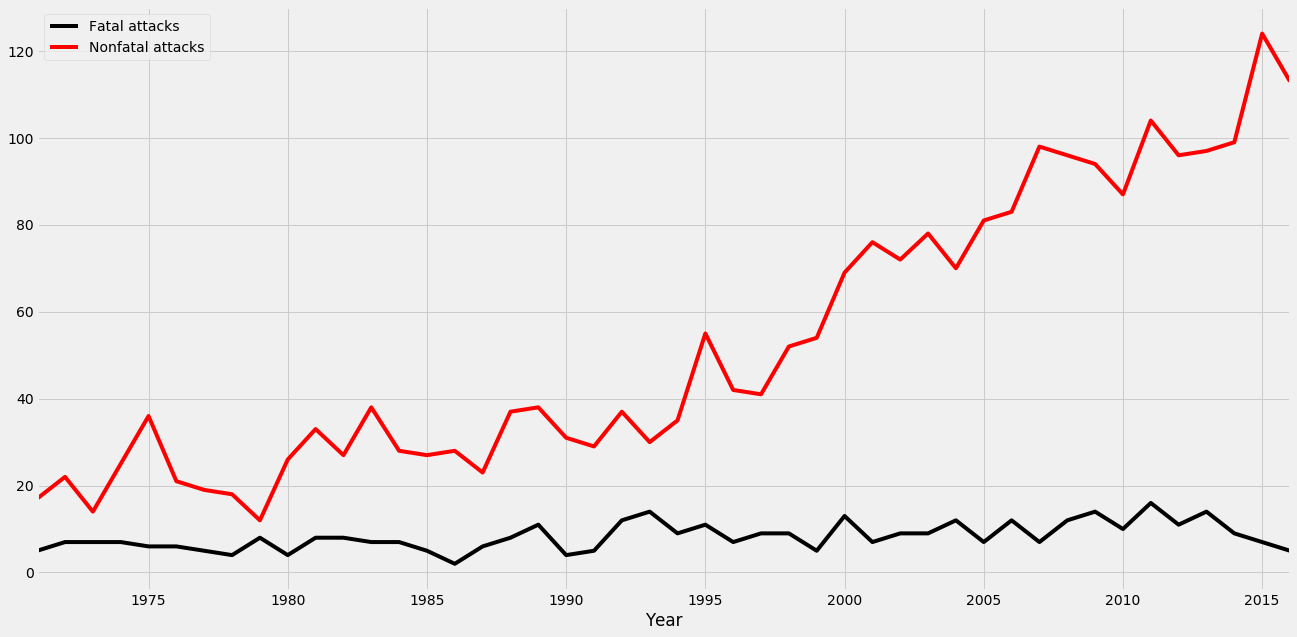

In [543]:
ax = attack[attack['Fatal (Y/N)'] == 'Y'].plot(kind='line', color='black', x='Year', y='Area', figsize=(20,10), label='Fatal attacks') 
attack[attack['Fatal (Y/N)'] == 'N'].plot(kind='line', color='red', x='Year', y='Area', figsize=(20,10), ax=ax, label='Nonfatal attacks') 

In [544]:
sharks['Activity'].value_counts()

Surfing                                                                                                                                                                                      906
Swimming                                                                                                                                                                                     811
Fishing                                                                                                                                                                                      323
Spearfishing                                                                                                                                                                                 308
Bathing                                                                                                                                                                                      149
Wading                             

In [545]:
swimming = sharks[(sharks["Activity"] == "Swimming") & (sharks['Fatal (Y/N)'] == 'N')]
surfing = sharks[(sharks["Activity"] == "Surfing") & (sharks['Fatal (Y/N)'] == 'N')]
fishing = sharks[(sharks["Activity"] == "Fishing") & (sharks['Fatal (Y/N)'] == 'N')]
wading = sharks[(sharks["Activity"] == "Wading") & (sharks['Fatal (Y/N)'] == 'N')]

In [546]:
swim_counts_fatal = swimming["Year"].value_counts().to_frame().reset_index()
surf_counts_fatal = surfing["Year"].value_counts().to_frame().reset_index()
fish_counts_fatal = fishing["Year"].value_counts().to_frame().reset_index()
wade_counts_fatal = wading["Year"].value_counts().to_frame().reset_index()

In [547]:
swim_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
surf_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
fish_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
wade_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)

swim_counts_fatal.sort_values(by="Year_",inplace=True)
surf_counts_fatal.sort_values(by="Year_",inplace=True)
fish_counts_fatal.sort_values(by="Year_",inplace=True)
wade_counts_fatal.sort_values(by="Year_",inplace=True)

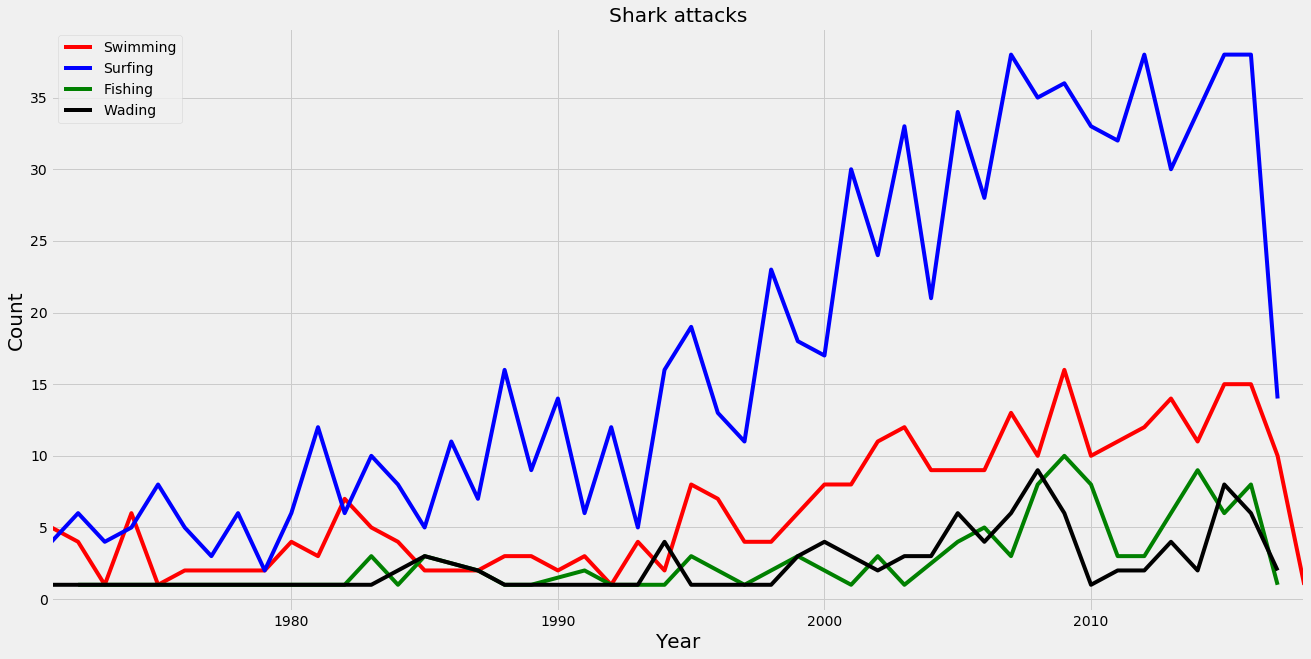

In [604]:
ax = swim_counts_fatal[swim_counts_fatal["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_fatal[surf_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_fatal[fish_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_fatal[wade_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Year', fontsize=20)

In [554]:
sharks.groupby("Activity")["Sex"].value_counts()

Activity                                                                                                                                                                                                                                                        Sex
                                                                                                                                                                                                                                                                M       1
 a canoe was pursuing a schooner that had forcibily abducted 5 young girls                                                                                                                                                                                      M       1
"Boat accident"                                                                                                                                                                                                 

In [556]:
swimming2 = sharks[(sharks["Activity"] == "Swimming") | (sharks['Fatal (Y/N)'] == 'N')]
surfing2 = sharks[(sharks["Activity"] == "Surfing") | (sharks['Fatal (Y/N)'] == 'N')]
fishing2 = sharks[(sharks["Activity"] == "Fishing") | (sharks['Fatal (Y/N)'] == 'N')]
wading2 = sharks[(sharks["Activity"] == "Wading") | (sharks['Fatal (Y/N)'] == 'N')]

In [557]:
swim2_counts_fatal = swimming["Sex"].value_counts().to_frame().reset_index()
surf2_counts_fatal = surfing["Sex"].value_counts().to_frame().reset_index()
fish2_counts_fatal = fishing["Sex"].value_counts().to_frame().reset_index()
wade2_counts_fatal = wading["Sex"].value_counts().to_frame().reset_index()

In [568]:
male_swimming = swimming[swimming["Sex"] == "M"]
female_swimming = swimming[swimming["Sex"] == "F"]
male_surfing = surfing[surfing["Sex"] == "M"]
female_surfing= surfing[surfing["Sex"] == "M"]
male_fishing = fishing[fishing["Sex"] == "M"]
female_fishing = fishing[fishing["Sex"] == "M"]

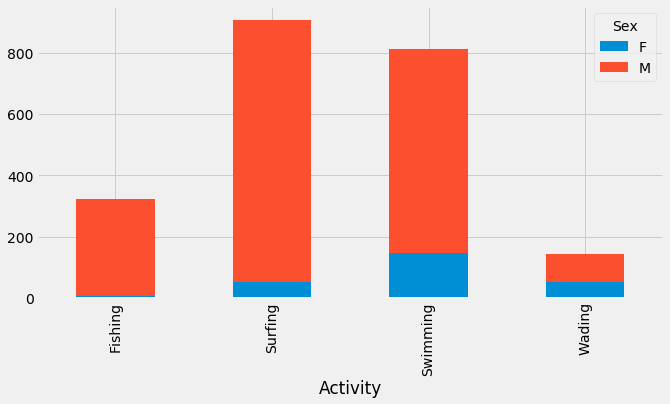

In [597]:
interested = sharks[sharks.Activity.isin(['Swimming', 'Surfing','Wading', 'Fishing'])]
interested.groupby('Activity')['Sex'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,5))